In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the dataset to python environment

In [2]:
data=pd.read_excel(r"C:\Users\LENOVO\Desktop\Assignment 6\iris.xls")

data.head()

2. Do the necessary pre-processing steps

Handling missing values

In [3]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [4]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Handling Outliers 

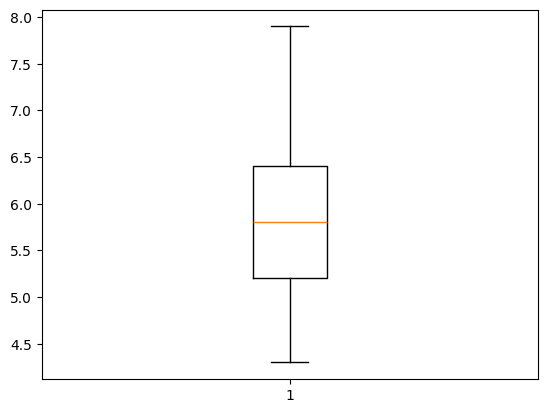

In [9]:
plt.boxplot(data['SL'])
plt.show()

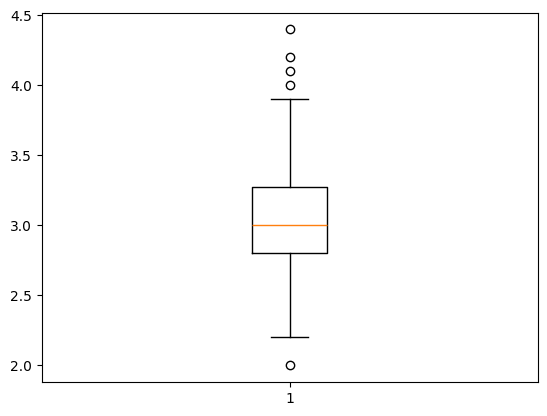

In [10]:
plt.boxplot(data['SW'])
plt.show()

In [11]:
Q1=np.percentile(data['SW'],25)
Q1

np.float64(2.8)

In [12]:
Q3=np.percentile(data['SW'],75)
Q3

np.float64(3.275)

In [13]:
IQR=Q3-Q1
IQR

np.float64(0.4750000000000001)

In [14]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [15]:
upper_limit

np.float64(3.9875)

In [16]:
lower_limit

np.float64(2.0874999999999995)

In [17]:
outlier = []
for x in data['SW']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)

In [18]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
ind = data['SW']>upper_limit
ind1=data['SW']<lower_limit
loca1 = data.loc[ind].index
loca2 = data.loc[ind1].index

In [20]:
loca1

Index([14, 15, 32, 33], dtype='int64')

In [21]:
loca2

Index([60], dtype='int64')

In [22]:
data.drop(loca1, inplace = True)

In [23]:
data.drop(loca2, inplace = True)

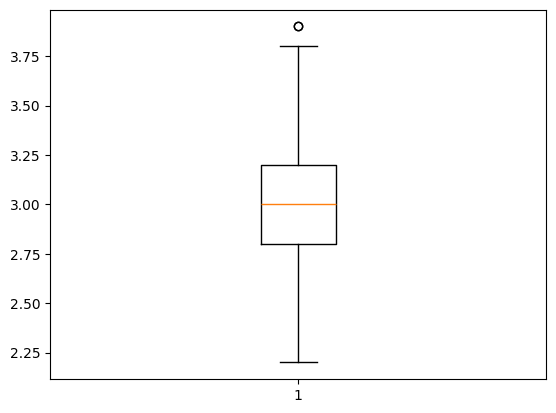

In [24]:
plt.boxplot(data['SW'])
plt.show()

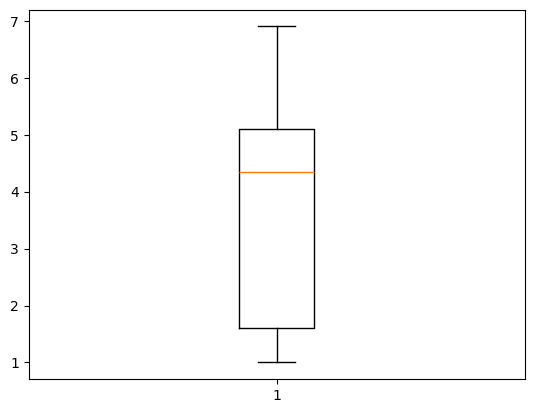

In [25]:
plt.boxplot(data['PL'])
plt.show()

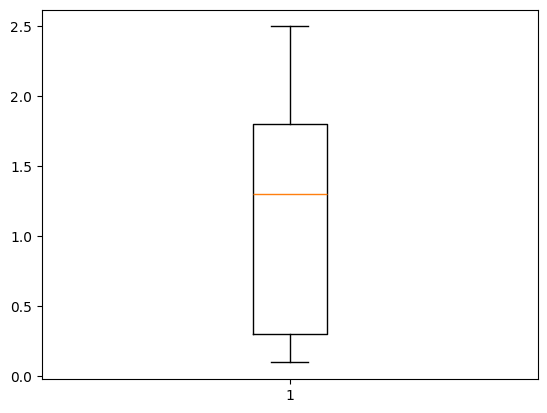

In [26]:
plt.boxplot(data['PW'])
plt.show()

In [27]:
data.shape

(145, 5)

In [28]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [30]:
data['Classification'] = le.fit_transform(data['Classification'])


In [31]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [32]:
x=data.drop('Classification',axis=1)
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [33]:
y=data['Classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int64

Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [35]:
x_scaled = scaler.fit_transform(x)
x_scaled_data=pd.DataFrame(x_scaled,columns=x.columns)


In [36]:
print(x_scaled_data.head())

         SL        SW        PL        PW
0  0.222222  0.764706  0.067797  0.041667
1  0.166667  0.470588  0.067797  0.041667
2  0.416667  0.588235  0.050847  0.041667
3  0.083333  0.529412  0.084746  0.041667
4  0.194444  0.823529  0.067797  0.041667


3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the sessions)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled_data,y,test_size = 0.25,random_state = 42)

Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg =log_reg.fit(x_train,y_train)

In [39]:
y_pred = log_reg.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [41]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average='macro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred))

Accuracy is :  0.9459459459459459
Precision is :  0.9393939393939394
Recall is :  0.9523809523809524
F1 Score is :  0.9410256410256409
confusion matrix is :  [[14  0  0]
 [ 0  9  0]
 [ 0  2 12]]


K-NN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
metric_k = []
neighbors = np.arange(3,15)

In [44]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [45]:
metric_k

[0.9459459459459459,
 0.9459459459459459,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.918918918918919,
 0.9459459459459459,
 0.918918918918919]

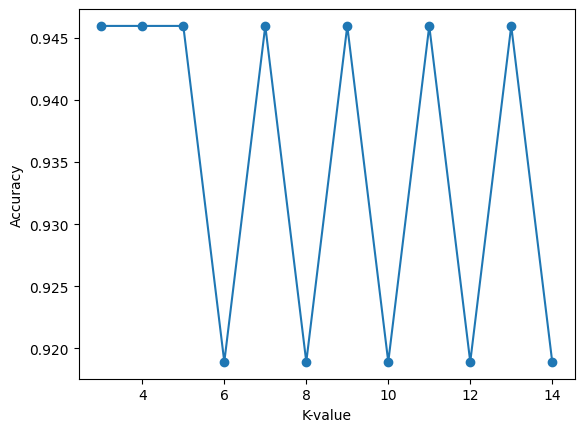

In [46]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.show()

In [47]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [48]:
print('Accuracy is :',accuracy_score(y_test,y_predictions))
print('Precision is :',precision_score(y_test,y_predictions,average='macro'))
print('Recall is :',recall_score(y_test,y_predictions,average='macro'))
print('F1 Score is :',f1_score(y_test,y_predictions,average='macro'))

Accuracy is : 0.9459459459459459
Precision is : 0.9391534391534391
Recall is : 0.9391534391534391
F1 Score is : 0.9391534391534391


In [49]:
confusion_matrix(y_test,y_predictions)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]])

Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [52]:
y_pred = nb_classifier.predict(x_test)

In [53]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy is :  0.9459459459459459
Precision is :  0.9393939393939394
Recall is :  0.9523809523809524
F1 Score is :  0.9410256410256409


In [54]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]])

SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)


In [57]:
y_pred_svm=svm_cls.predict(x_test)

In [58]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy is :  0.9459459459459459
Precision is :  0.9393939393939394
Recall is :  0.9523809523809524
F1 Score is :  0.9410256410256409


In [59]:
svm_cls=SVC(kernel='rbf')
svm_cls=svm_cls.fit(x_train,y_train)


In [60]:
y_pred_svm=svm_cls.predict(x_test)

In [61]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average='macro'))

Accuracy is :  0.9459459459459459
Precision is :  0.9393939393939394
Recall is :  0.9523809523809524
F1 Score is :  0.9410256410256409


Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred = dt_cls.predict(x_test)

In [64]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred,average='macro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred))

Accuracy is :  0.918918918918919
Precision is :  0.9076923076923077
Recall is :  0.9153439153439153
F1 Score is :  0.9103313840155945
confusion matrix is :  [[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [67]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_rf))
print('Precision is : ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred_rf,average='macro'))
print('F1 Score is : ',f1_score(y_test,y_pred_rf,average='macro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_rf))

Accuracy is :  0.918918918918919
Precision is :  0.9076923076923077
Recall is :  0.9153439153439153
F1 Score is :  0.9103313840155945
confusion matrix is :  [[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


The models SVM, Naive Bayes, and Logistic Regression give the same accuracy of 0.9459 and random forest and Decision Tree give the accuracy of 0.9189.KNN is slightly lower in F1 Score 0.9392.Since SVM, Naive Bayes, and Logistic Regression all have identical performance metrics, these three models can be considered as providing the best results among the given models